<a href="https://colab.research.google.com/github/fpant1/introtoaiworksheets/blob/main/MarvelSearch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Search Notebook 

In this notebook we implement two different search algorithms, breadth first search and depth first search.

We also use a new package called 'networkx' which is a general purpose graph library for Python, which we use for visualisng the graph. 

We also use a dataset of the Marvel Universe social graph, which links two characters if they appear in the same comic. You can find out more information about it here: https://syntagmatic.github.io/marvel/

In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from networkx.drawing.nx_agraph import write_dot, graphviz_layout
# the below apt install in debian/linux/colab specific... sorry windows/mac users (use colab if you can't get this to work (it is used for visualising graphs)
!apt install libgraphviz-dev
!pip install pygraphviz

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  libgail-common libgail18 libgtk2.0-0 libgtk2.0-bin libgtk2.0-common
  libgvc6-plugins-gtk libxdot4
Suggested packages:
  gvfs
The following NEW packages will be installed:
  libgail-common libgail18 libgraphviz-dev libgtk2.0-0 libgtk2.0-bin
  libgtk2.0-common libgvc6-plugins-gtk libxdot4
0 upgraded, 8 newly installed, 0 to remove and 37 not upgraded.
Need to get 2,120 kB of archives.
After this operation, 7,128 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/main amd64 libgtk2.0-common all 2.24.32-1ubuntu1 [125 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/main amd64 libgtk2.0-0 amd64 2.24.32-1ubuntu1 [1,769 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/main amd64 libgail18 amd64 2.24.32-1ubuntu1 [14.2 kB]
Get:4 http://archive.ubuntu.com/ubuntu bionic/main amd64 libgail-common amd64 2.24.32

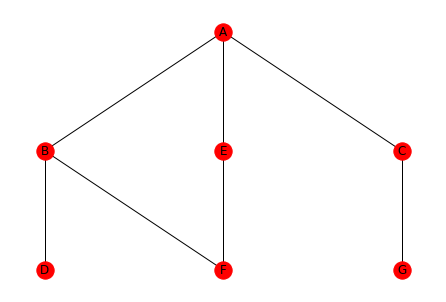

In [ ]:
graph = {'A': ['B', 'C', 'E'],
         'B': ['D', 'F'],
         'C': ['G',],
         'D': [],
         'E': ['F'],
         'F': ['B', 'E'],
          'G': []}

graph_viz = nx.to_networkx_graph(graph)
nx.draw(graph_viz, with_labels = True, node_color='r', pos =graphviz_layout(graph_viz, prog='dot'))
plt.show()

In [ ]:
def dfs(g, v, goal='NA', explored=[], frontier=[]):
    if v not in explored:
        explored.append(v)
    if v == goal: 
        print("GOAL")
        print(len(explored))
        frontier.append(v)
        return explored
    for w in g[v]:
        if w not in explored:
            frontier.append(v)
            p = dfs(g, w, goal, explored, frontier)
            if p: 
                return p
    return []



In [ ]:
dfs(graph, 'A', 'F')

GOAL
4


['A', 'B', 'D', 'F']

Recursion is not a natural fit for a BFS. With DFS, the call stack keeps tracks of the locations you've visited. Queu makes more sense with BFS

In [ ]:
import collections

def bfs(graph, start, goal='NA', verbose=False):
    frontier, path, queue = [], [], collections.deque([start])
    while queue:
        if verbose:
            print("QUEUE: "+str(queue))
        vertex = queue.popleft()
        path.append(vertex)
        if vertex == goal:
            print("GOAL")
            print(len(path))
            break
        for neighbour in graph[vertex]: 
            if neighbour not in frontier:
                frontier.append(neighbour) 
                queue.append(neighbour) 
            
    return path

path = bfs(graph, 'A', 'F') 
print(path)

GOAL
6
['A', 'B', 'C', 'E', 'D', 'F']


In [ ]:
G = nx.Graph()

In [ ]:
df = pd.read_csv('https://ryanmcconville.com/hero-network.csv', header=None)
for index, r in df.iterrows():
    if G.has_node(r[0]):
        pass
    else:
        G.add_node(r[0])
    if G.has_node(r[1]):
        pass
    else:
        G.add_node(r[1])



In [ ]:
for index, r in df.iterrows():
    G.add_edge(r[0], r[1])


In [ ]:
print(nx.info(G))

Graph with 6426 nodes and 167219 edges


In [ ]:
# write the graph - this .gexf file can be loaded into visualisation software like Gephi.
nx.write_gexf(G, 'marvel_graph.gexf')

In [ ]:
marvel_graph = nx.to_dict_of_lists(G)

In [ ]:
path = bfs(marvel_graph, 'SPIDER-MAN/PETER PAR', 'HUMUS SAPIEN') 
print("The BFS path from spider man to humus sapien is %s" % path)

GOAL
4631
The BFS path from spider man to humus sapien is ['SPIDER-MAN/PETER PAR', 'NOVA/RICHARD RIDER', 'FIRESTAR/ANGELICA JO', 'THUNDERBALL/DR. ELIO', 'NAMORITA/NITA PRENTI', 'SPEEDBALL/ROBBIE BAL', 'HULK/DR. ROBERT BRUC', 'NIGHT THRASHER/DUANE', 'STACY, PAUL', 'STACY, JILL', 'STACY, ARTHUR', 'PARKER, MAY', 'VENOM/EDDIE BROCK', 'BLADE', 'KINGPIN/WILSON FISK', 'LEEDS, BETTY BRANT', 'ROBERTSON, JOE', 'FORTUNATO, GIACOMO J', 'MORBIUS/DR. MICHAEL ', 'WATSON-PARKER, MARY ', 'WATSON, ANNA', 'CALDRONE, JAVIER', 'LUMLEY, JUDY', 'MAXWELL, MORRIS', 'THORSON, DR. WALTER', 'JAMESON, J. JONAH', 'DOLMAN', 'URICH, BEN', 'KWAN, TERRY', 'OVERRIDE/DR. GREGORY', 'ICEMAN/ROBERT BOBBY ', 'THOMPSON, EUGENE FLA', 'THOR/DR. DONALD BLAK', 'TOKKOTS', 'GRANT, GLORIA GLORY', 'FAIRMONT, HANNAH', 'MCCORMICK, BARRY', 'DR. OCTOPUS/OTTO OCT', 'BULLSEYE II/BENJAMIN', 'WARD, SEN. STEWART', 'KAINE', 'ELLIS, KEN', 'SPIDER-MAN CLONE/BEN', 'GRIM HUNTER/KRAVINOF', 'BYRNES, GAYLE WATSON', 'TOMBSTONE/LONNIE THO', 'TREVANE, D

In [ ]:
path = bfs(marvel_graph, 'SPIDER-MAN/PETER PAR', 'PARKER, MAY') 
print("The BFS path from spider man to may parker is %s" % path)

GOAL
12
The BFS path from spider man to may parker is ['SPIDER-MAN/PETER PAR', 'NOVA/RICHARD RIDER', 'FIRESTAR/ANGELICA JO', 'THUNDERBALL/DR. ELIO', 'NAMORITA/NITA PRENTI', 'SPEEDBALL/ROBBIE BAL', 'HULK/DR. ROBERT BRUC', 'NIGHT THRASHER/DUANE', 'STACY, PAUL', 'STACY, JILL', 'STACY, ARTHUR', 'PARKER, MAY']


In [ ]:
explored, frontier = [], []
# Python has a built in recursion limit (i.e. number of recusrive function calls that can be made), which may be exceeded on some systems with the following search
# however, the below two lines will increase the recursion limit..
sys.setrecursionlimit(10000)
path = dfs(marvel_graph,'SPIDER-MAN/PETER PAR', 'HUMUS SAPIEN',  explored=[], frontier=[])
print("The DFS path from spider man to humus sapien is %s" % path)

1000
GOAL
1277
The DFS path from spider man to humus sapien is ['SPIDER-MAN/PETER PAR', 'NOVA/RICHARD RIDER', 'FIRESTAR/ANGELICA JO', 'NIGHT THRASHER/DUANE', 'THUNDERBALL/DR. ELIO', 'HULK/DR. ROBERT BRUC', 'NAMORITA/NITA PRENTI', 'SPEEDBALL/ROBBIE BAL', 'JUSTICE II/VANCE AST', 'HINDSIGHT LAD/CARLTO', 'WATSON-PARKER, MARY ', 'WATSON, ANNA', 'PARKER, MAY', 'STACY, PAUL', 'VENOM/EDDIE BROCK', 'STACY, JILL', 'STACY, ARTHUR', 'DR. OCTOPUS/OTTO OCT', 'WARD, SEN. STEWART', 'LEEDS, BETTY BRANT', 'BLADE', 'ROBERTSON, JOE', 'KINGPIN/WILSON FISK', 'FORTUNATO, GIACOMO J', 'MORBIUS/DR. MICHAEL ', 'GRANT, GLORIA GLORY', 'THOR/DR. DONALD BLAK', 'ZANIAC/BRAD WOLFE', 'JUSTICE PEACE', 'THING/BENJAMIN J. GR', 'UATU', 'CAPTAIN AMERICA', 'CYCLOPS/SCOTT SUMMER', 'THUNDERSTRIKE/ERIC K', 'GHOST RIDER III/DAN ', 'GALACTUS/GALAN', 'TIGRA/GREER NELSON', 'WASP/JANET VAN DYNE ', 'QUICKSILVER/PIETRO M', 'MOCKINGBIRD/DR. BARB', 'IRON MAN/TONY STARK ', 'STEELE, SIMON/WOLFGA', 'FORTUNE, DOMINIC', 'RAVEN, SABBATH II/EL

In [ ]:
path = dfs(marvel_graph,'SPIDER-MAN/PETER PAR', 'PARKER, MAY',  explored=[], frontier=[])
print("The DFS path from spider man to may parker is %s" % path)

GOAL
13
The DFS path from spider man to may parker is ['SPIDER-MAN/PETER PAR', 'NOVA/RICHARD RIDER', 'FIRESTAR/ANGELICA JO', 'NIGHT THRASHER/DUANE', 'THUNDERBALL/DR. ELIO', 'HULK/DR. ROBERT BRUC', 'NAMORITA/NITA PRENTI', 'SPEEDBALL/ROBBIE BAL', 'JUSTICE II/VANCE AST', 'HINDSIGHT LAD/CARLTO', 'WATSON-PARKER, MARY ', 'WATSON, ANNA', 'PARKER, MAY']
